#### Conway’s Game of Life has four rules.

1. If a cell is ON and has fewer than two neighbors that are ON, it turns OFF.
2. If a cell is ON and has either two or three neighbors that are ON, it remains ON.
3. If a cell is ON and has more than three neighbors that are ON, it turns OFF.
4. If a cell is OFF and has exactly three neighbors that are ON, it turns ON.

These rules are meant to mirror some basic ways that a group of organisms might fare over time: underpopulation and overpopulation kill cells by turning a cell OFF when it has fewer than two neighbors or more than three, and cells stay ON and reproduce by turning another cell from OFF to ON when the population is balanced. But what about cells at the edge of the grid? Which cells are their neighbors? To answer this question, you need to think about boundary conditions, the rules that govern what happens to cells at the edges or boundaries of the grid. I’ll address this question by using toroidal boundary conditions, meaning that the square grid wraps around so that its shape is a torus.

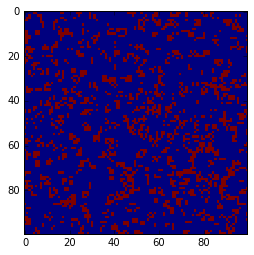

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

ON = 255
OFF = 0
vals = [ON, OFF]

def randomGrid(N):
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def addGlider(i, j, grid):
    """adds a glider with top left cell at (i, j)"""
    glider = np.array([[0,    0, 255], 
                       [255,  0, 255], 
                       [0,  255, 255]])
    grid[i:i+3, j:j+3] = glider

def addGosperGliderGun(i, j, grid):
    """adds a Gosper Glider Gun with top left cell at (i, j)"""
    gun = np.zeros(11*38).reshape(11, 38)

    gun[5][1] = gun[5][2] = 255
    gun[6][1] = gun[6][2] = 255

    gun[3][13] = gun[3][14] = 255
    gun[4][12] = gun[4][16] = 255
    gun[5][11] = gun[5][17] = 255
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 255
    gun[7][11] = gun[7][17] = 255
    gun[8][12] = gun[8][16] = 255
    gun[9][13] = gun[9][14] = 255

    gun[1][25] = 255
    gun[2][23] = gun[2][25] = 255
    gun[3][21] = gun[3][22] = 255
    gun[4][21] = gun[4][22] = 255
    gun[5][21] = gun[5][22] = 255
    gun[6][23] = gun[6][25] = 255
    gun[7][25] = 255

    gun[3][35] = gun[3][36] = 255
    gun[4][35] = gun[4][36] = 255

    grid[i:i+11, j:j+38] = gun

def update(frameNum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line 
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # compute 8-neghbor sum
            # using toroidal boundary conditions - x and y wrap around 
            # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] + 
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
                         grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + 
                         grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            # apply Conway's rules
            if grid[i, j]  == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    # update data
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

# main() function
def main():
    # set grid size
    N = 100
        
    # set animation update interval
    updateInterval = 50

    # declare grid
    grid = np.array([])
    
    # glider demo flag
    glider = False
    gosper = False
    if glider:
        grid = np.zeros(N*N).reshape(N, N)
        addGlider(1, 1, grid)
    elif gosper:
        grid = np.zeros(N*N).reshape(N, N)
        addGosperGliderGun(10, 10, grid)
    else:
        # populate grid with random on/off - more off than on
        grid = randomGrid(N)

    # set up animation
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                                  frames = 10,
                                  interval=updateInterval,
                                  save_count=50)

    # set output file
    movfile = None
    if movfile:
        ani.save(movfile, fps=30, extra_args=['-vcodec', 'libx264'])

    plt.show()

# call main
if __name__ == '__main__':
    main()